## Python project: Zeros of polynomials with 0,1 coefficients
---
In this Jupyter notebook we will explain how to use Python to recreate the interesting image on page 319 of the paper
**Zeros of polynomials with 0,1 coefficients**, B. Poonen, A.M. Odlyzko. *L'Enseignement Math.* **39** (1993), 317-348.
 
First, you may want to run the cell below to display the image of interest from the paper.

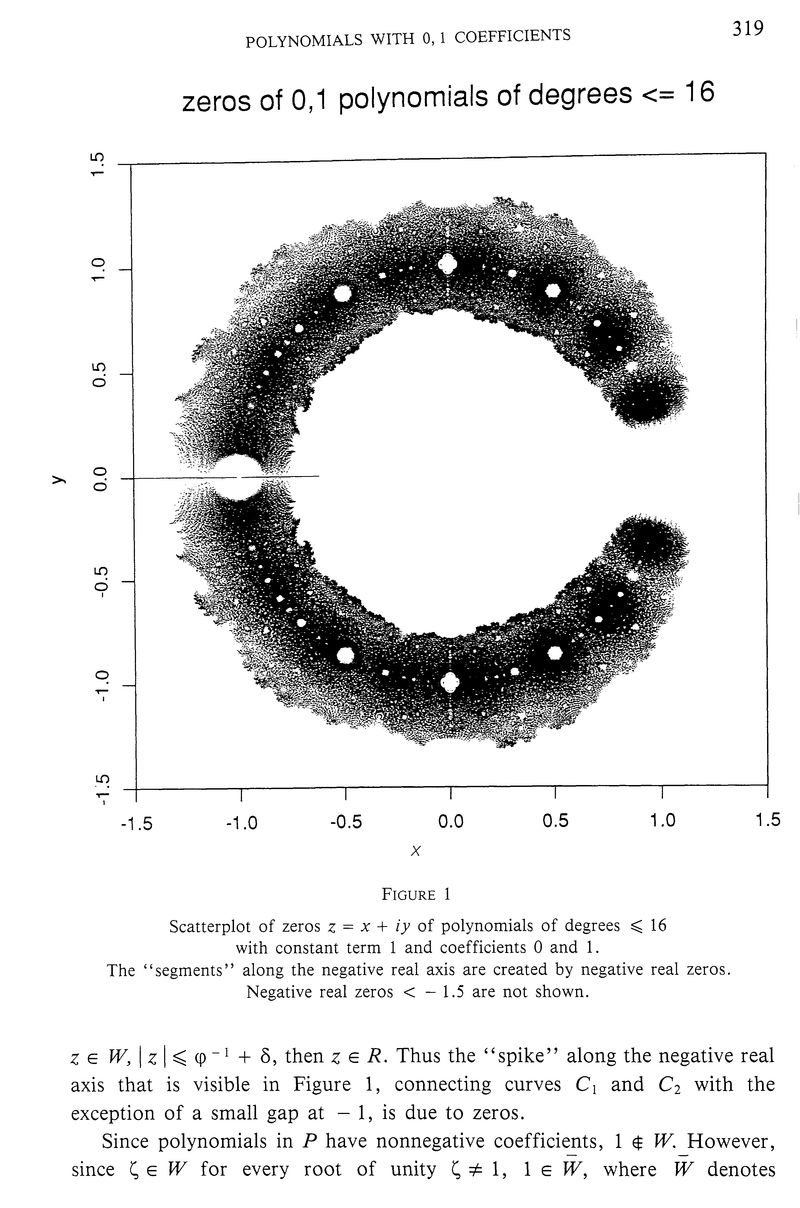

In [1]:
from PIL import Image
Image.open("C:\Users\jajaco3\Documents\GitHub\ResearchPresentation\zeros\PoonenOdlyzkoImage.png")

As described in the caption, this image is the zeros of all polynomials

$$ a_n x^n +  a_{n-1}x^{n-1} + \cdots + a_1 x + 1=0\\$$ 
$$a_i\in \{0,1\}$$

of degree $n\leq 16$.

Here, we use python to easily reproduce this image.

In the cell below, we start by importing a function from Itertools, a package of ready-made tools for very particular types of iteration. 

With pdmax, we declare the maximum degree of polynomial to find roots for.

We use the function 'product' from 'itertools' to iterate a complete list of all possible 0,1 coefficients of polynomials of degree less than or equal to pdmax minus one. 

We name this list 'coefficients' below.

In [2]:
from itertools import product
pdmax = 16
coefficients = list(product(range(2), repeat = pdmax ))

For instance, to see all possible 0,1 coefficients of polynomials of degree less than or equal to 4 (any constant term) run the cell below.

In [3]:
coefficientsExample = list(product(range(2), repeat = 5 ))
coefficientsExample

[(0, 0, 0, 0, 0),
 (0, 0, 0, 0, 1),
 (0, 0, 0, 1, 0),
 (0, 0, 0, 1, 1),
 (0, 0, 1, 0, 0),
 (0, 0, 1, 0, 1),
 (0, 0, 1, 1, 0),
 (0, 0, 1, 1, 1),
 (0, 1, 0, 0, 0),
 (0, 1, 0, 0, 1),
 (0, 1, 0, 1, 0),
 (0, 1, 0, 1, 1),
 (0, 1, 1, 0, 0),
 (0, 1, 1, 0, 1),
 (0, 1, 1, 1, 0),
 (0, 1, 1, 1, 1),
 (1, 0, 0, 0, 0),
 (1, 0, 0, 0, 1),
 (1, 0, 0, 1, 0),
 (1, 0, 0, 1, 1),
 (1, 0, 1, 0, 0),
 (1, 0, 1, 0, 1),
 (1, 0, 1, 1, 0),
 (1, 0, 1, 1, 1),
 (1, 1, 0, 0, 0),
 (1, 1, 0, 0, 1),
 (1, 1, 0, 1, 0),
 (1, 1, 0, 1, 1),
 (1, 1, 1, 0, 0),
 (1, 1, 1, 0, 1),
 (1, 1, 1, 1, 0),
 (1, 1, 1, 1, 1)]

As we only are interested in coefficients with constant term one, by running the next cell we add a 1 to the end of each tuple in the list of coefficients we first created.

In [4]:
for k in range(len(coefficients)):
    coefficients[k] = coefficients[k] + tuple([1])

For instance, doing this for the 'coefficientsExample' list produces all 0,1 coefficients of polynomials of degree less than or equal to 5 with constant term 1 

In [5]:
for k in range(len(coefficientsExample)):
    coefficientsExample[k] = coefficientsExample[k] + tuple([1])
    
coefficientsExample

[(0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 1),
 (1, 1, 0, 0, 0, 1),
 (1, 1, 0, 0, 1, 1),
 (1, 1, 0, 1, 0, 1),
 (1, 1, 0, 1, 1, 1),
 (1, 1, 1, 0, 0, 1),
 (1, 1, 1, 0, 1, 1),
 (1, 1, 1, 1, 0, 1),
 (1, 1, 1, 1, 1, 1)]

Next, we use the image package to create a png file with 'imgx' times 'imgy' pixels (we chose 1080 by 1080 pixels).

In [6]:
imgx = 1080
imgy = 1080
image = Image.new("1", (imgx, imgy), "white")

We then import the python package numpy which contains the function 'roots' we will use to find roots.

In [7]:
import numpy
help(numpy.roots)

Help on function roots in module numpy.lib.polynomial:

roots(p)
    Return the roots of a polynomial with coefficients given in p.
    
    The values in the rank-1 array `p` are coefficients of a polynomial.
    If the length of `p` is n+1 then the polynomial is described by::
    
      p[0] * x**n + p[1] * x**(n-1) + ... + p[n-1]*x + p[n]
    
    Parameters
    ----------
    p : array_like
        Rank-1 array of polynomial coefficients.
    
    Returns
    -------
    out : ndarray
        An array containing the complex roots of the polynomial.
    
    Raises
    ------
    ValueError
        When `p` cannot be converted to a rank-1 array.
    
    See also
    --------
    poly : Find the coefficients of a polynomial with a given sequence
           of roots.
    polyval : Compute polynomial values.
    polyfit : Least squares polynomial fit.
    poly1d : A one-dimensional polynomial class.
    
    Notes
    -----
    The algorithm relies on computing the eigenvalues of the

In the next cell, the numbers 'xa', 'xb', 'ya', and 'yb' determine a rectangle

$$[xa,xb]\times [ya,yb]$$

We will draw, as pixels in the png file, all the roots $a+bj$ in the plane for which $(a,b)$ fit into this rectangle.

In [8]:
# rectangle to include roots from
xa = -1.5
xb = 1.5
ya = -1.5
yb = 1.5

The Python Imaging Library is based upon an upside down standard Cartesian pixel coordinate system: $(0,0)$ refers to the pixel in the upper left corner of the image; $(0, imgy-1)$ is the pixel in the lower left corner; $(imgx -1, imgy -1)$ is the pixel in the lower right corner; and $(imgx-1, 0)$ the pixel in the upper right corner. 

When drawing the image, we rescale the roots to fit into the grid of pixels. In this rescaling, we also 'flip' the imaginary coordinate so that the picture we draw follows the standard cartesian coordinates.

For example, run the cell below to see which pixel the imaginary number $j$ appears as. 

In [9]:
kx = (imgx -1) * (1j.real -xa) / (xb -xa)  # rescale real coordinate to pixel
ky = (imgy -1) - (imgy-1) * (1j.imag - ya) / (yb - ya) # rescale imaginary coordinate to pixel
pixelFori = (int(kx), int(ky))
print pixelFori

(539, 179)


The code we use to draw the image is based upon source code that accompanied the article **A Digital Slice of Pi**,  Wayt Gibbs, *Scientific American Magazine* (May 2003).

Run the cell below. This will draw the image by placing a black pixel wherever a root appears and it will save the image just created.

In [18]:
for j in range(len(coefficients)):
    roots = numpy.roots(coefficients[j])
    for k in range(len(roots)):
        x = (imgx - 1) * (roots[k].real - xa) / (xb - xa) # rescale real coordinate to pixel kx
        y = (imgy -1) - (imgy - 1) * (roots[k].imag - ya) / (yb - ya) # rescale imaginary coordinate to pixel ky
        if x >= 0 and x <= imgx -1 and y >= 0 and y <= imgy - 1:
                image.putpixel((int(x), int(y)), 0) # place black dot for root, 
            
image.save("1080ResAllDegreeLessEqual16.png", "PNG")

Now let's view the image.

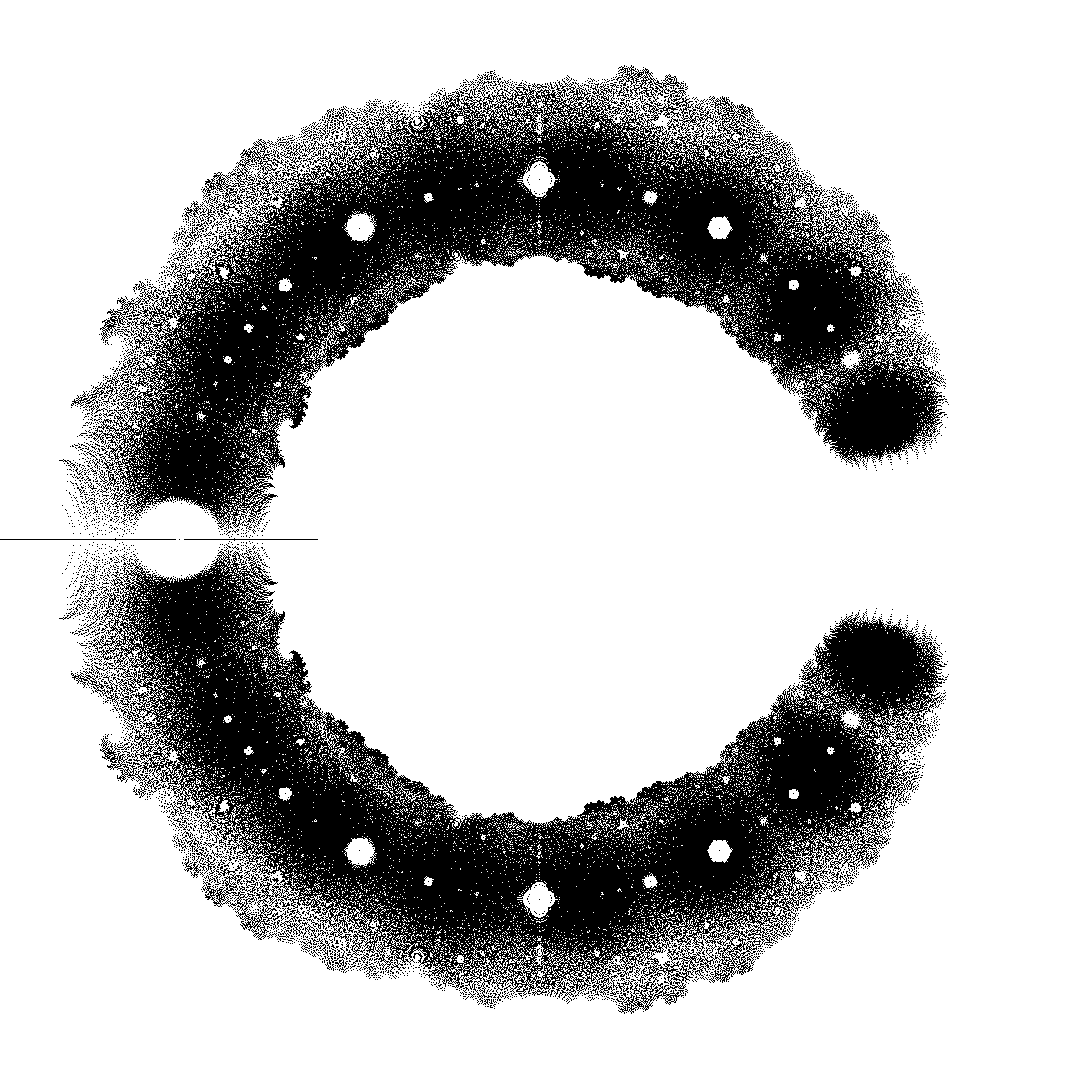

In [19]:
Image.open("1080ResAllDegreeLessEqual16.png")

Next, let's draw a high resolution version. We start by creating a new image which is 10800 by 10800 pixels

In [20]:
imgx = 10800
imgy = 10800
HighResImage = Image.new("1", (imgx, imgy), "white")

Then, we run the next cell to draw and save the image.

In [21]:
for j in range(len(coefficients)):
    roots = numpy.roots(coefficients[j])
    for k in range(len(roots)):
        x = (imgx - 1) * (roots[k].real - xa) / (xb - xa) # rescale real coordinate to pixel kx
        y = (imgy -1) - (imgy - 1) * (roots[k].imag - ya) / (yb - ya) # rescale imaginary coordinate to pixel ky
        if x >= 0 and x <= imgx -1 and y >= 0 and y <= imgy - 1:
                HighResImage.putpixel((int(x), int(y)), 0) # place black dot for root, 
                    
HighResImage.save("10800ResAllDegreeLessEqual16.png", "PNG")

To view the high resolution version, run the cell below.

In [29]:
Image.open("10800ResAllDegreeLessEqual16.png")

We see now that the roots are most dense in the two 'disks' on the right.

Suppose that we zoom in on the lower 'disk'. Run the next cell to see what appears.

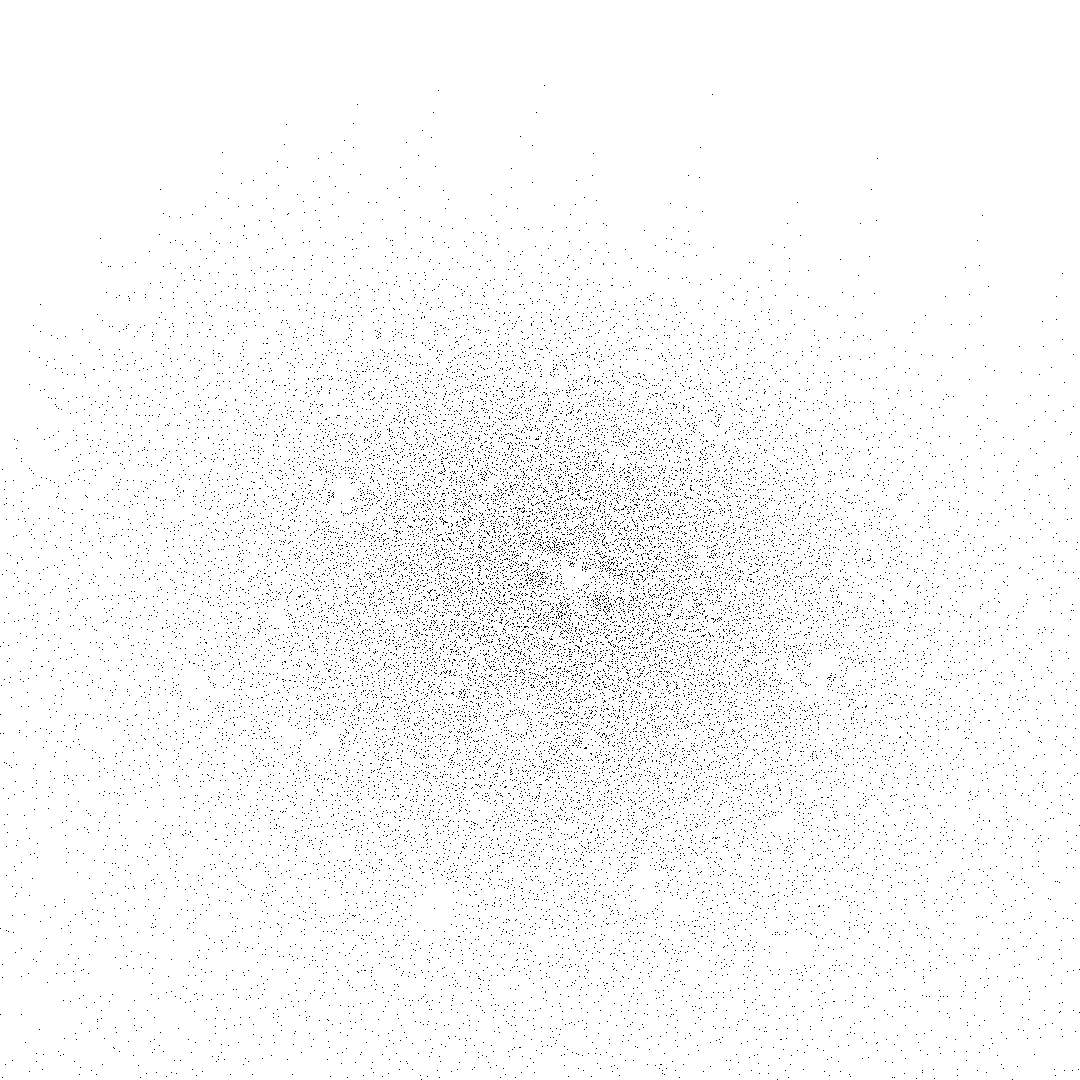

In [42]:
Image.open("C:\Users\jajaco3\Documents\GitHub\ResearchPresentation\zeros\ZoomView10800ResAllDegreeLessEqual16.png")